#  Compare input file data

In [2]:
import numpy as np
import xarray as xr
from salishsea_tools import utilities
from salishsea_tools import viz_tools
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
%matplotlib qt

In [4]:
wave_files = ['/opp/wwatch3/nowcast/01feb18/SoG_ww3_fields_20180201_20180201.nc'] 

mask = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn2DMeshMaskV17-02').tmaskutil.isel(time = 0).values

bar = utilities.statusbar('Creating WW3 parameters file ...', maxval = len(wave_files))
for wave_file in bar(wave_files):
    # load WW3 netcdf source file using xarray
    WW3 = xr.open_dataset(wave_file)
    NEMO_grid = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSnBathymetryV17-02')
    lat_lon_mesh = np.meshgrid(WW3.MAPSTA.latitude.values, WW3.MAPSTA.longitude.values)    
    xi = (NEMO_grid.latitude.values, NEMO_grid.longitude.values)
    points = np.array([lat_lon_mesh[0].T.ravel(), lat_lon_mesh[1].T.ravel()-360]).T
    xi = (NEMO_grid.latitude.values, NEMO_grid.longitude.values)
    mean_wave_array = WW3.t02.values
    data =  mean_wave_array[0].ravel()

Creating WW3 parameters file ... 100% (1 of 1) |################|Time:  0:00:00


In [5]:
%%timeit
mean_wave1 = griddata(points,data, xi, method='linear')

6.61 s ± 455 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/home/abhudia/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


1.1363636363636362

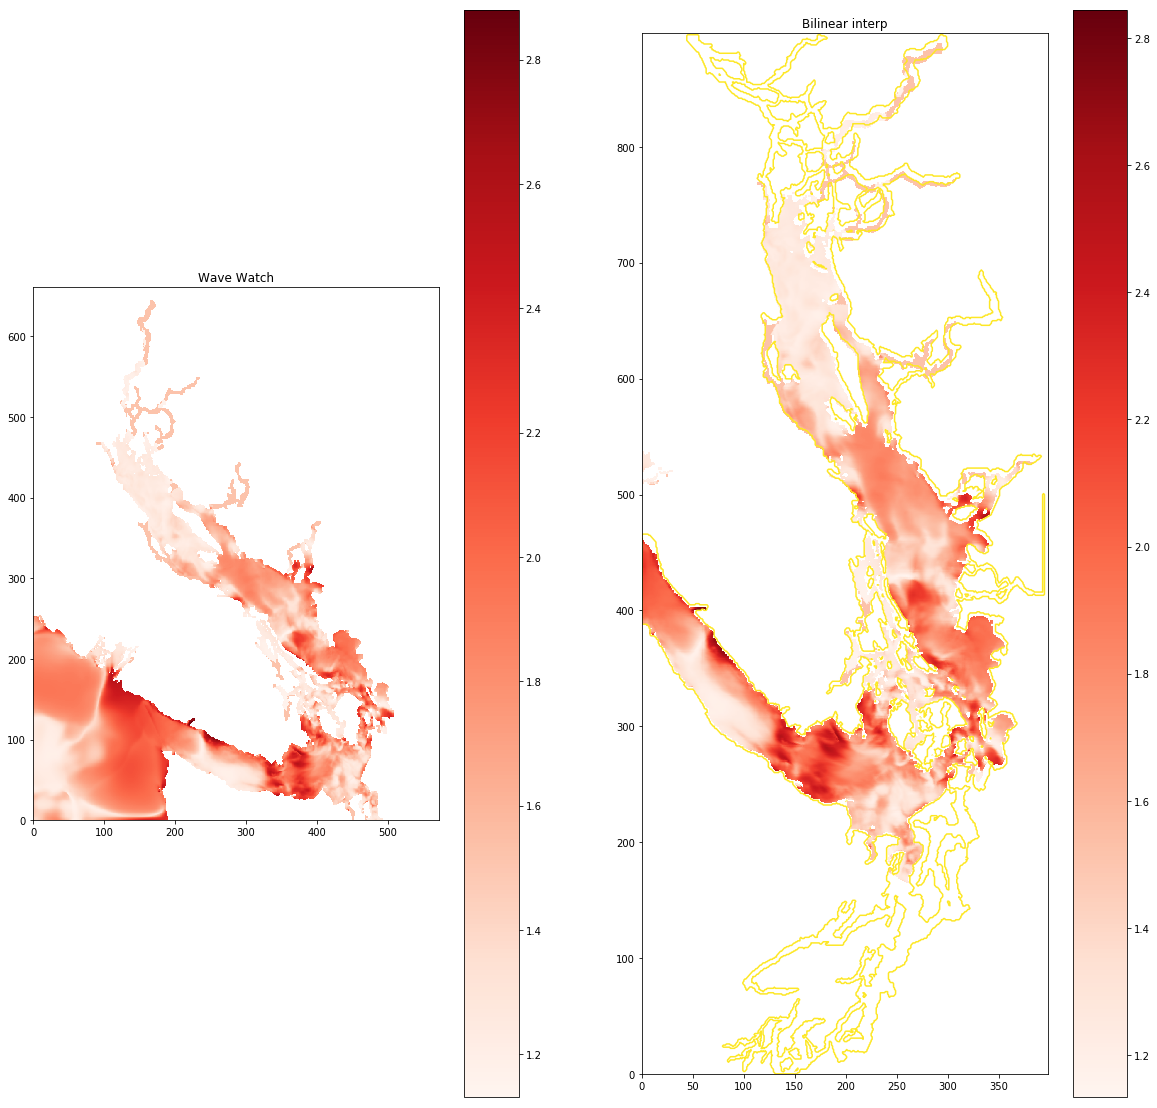

In [3]:
fig = plt.figure(figsize = (20,20) )
ax = plt.subplot(1,2,1)
plt.pcolormesh(mean_wave_array[0], cmap = 'Reds')
plt.colorbar()
plt.title('Wave Watch')
ax1 = plt.subplot(1,2,2)
plt.pcolormesh(mean_wave1, cmap = 'Reds')
plt.colorbar()
plt.contour(mask, levels = [-0.1, 0.1])
plt.title('Bilinear interp')
viz_tools.set_aspect(ax1)
viz_tools.set_aspect(ax)

Creating WW3 parameters file ... 100% (1 of 1) |################|Time:  0:00:07
/home/abhudia/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


1.1363636363636362

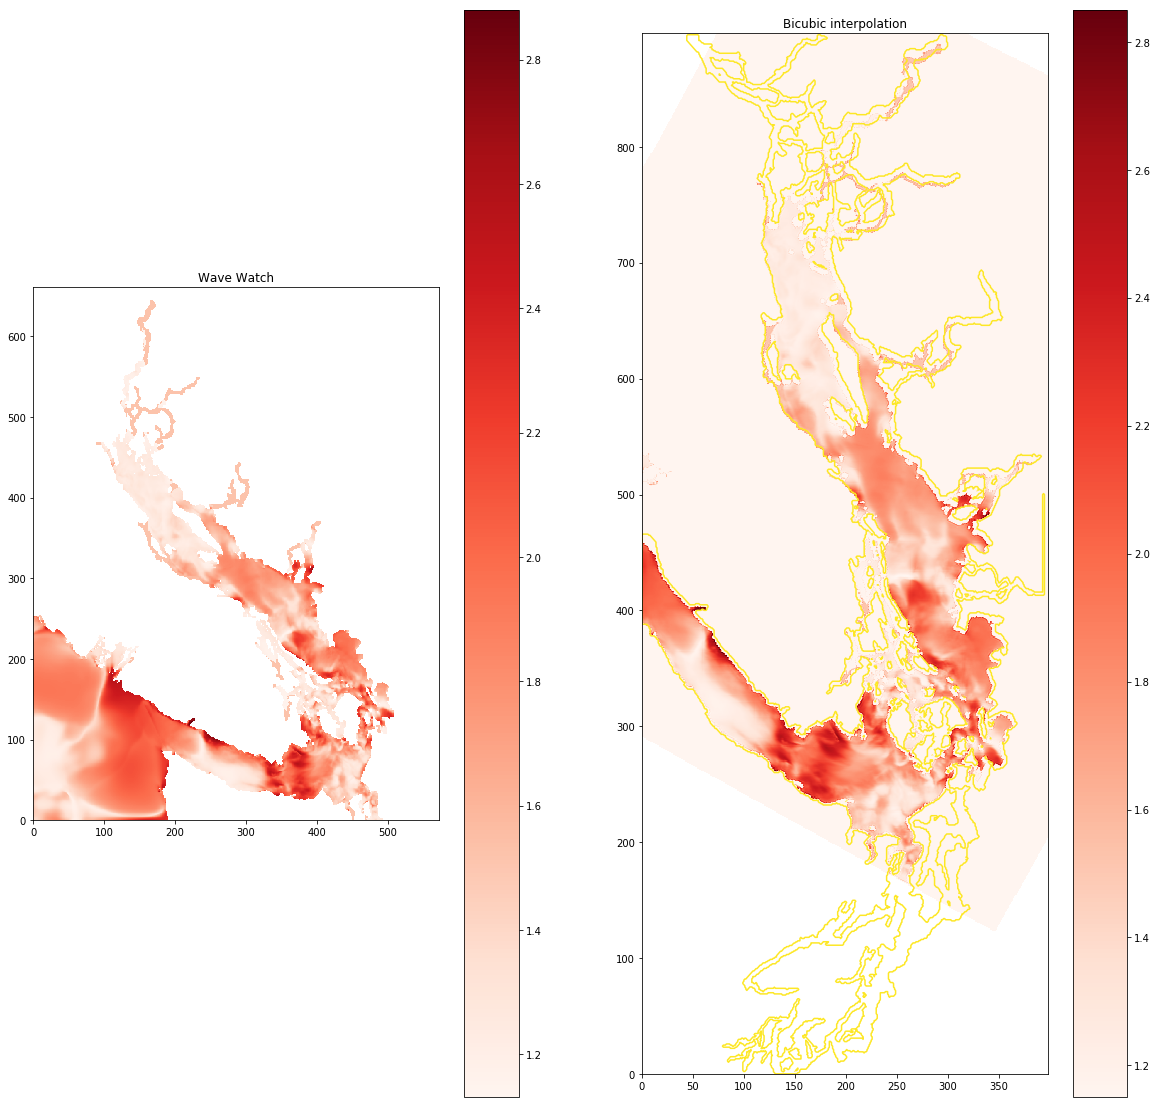

In [9]:
wave_files = ['temp/ww3test.nc'] 
dirname = 'temp/'


bar = utilities.statusbar('Creating WW3 parameters file ...', maxval = len(wave_files))
for wave_file in bar(wave_files):
    # load WW3 netcdf source file using xarray
    WW3 = xr.open_dataset(wave_file)
    NEMO_grid = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSnBathymetryV17-02')
    lat_lon_mesh = np.meshgrid(WW3.MAPSTA.latitude.values, WW3.MAPSTA.longitude.values)    
    points = np.array([lat_lon_mesh[0].T.ravel(), lat_lon_mesh[1].T.ravel()-360]).T
    xi = (NEMO_grid.latitude.values, NEMO_grid.longitude.values)
    mean_wave_array = WW3.t02.values
    data =  np.nan_to_num(mean_wave_array[0].ravel())
    mean_wave = griddata(points,data, xi, method='cubic')
    mask = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn2DMeshMaskV17-02').tmaskutil.isel(time = 0).values


fig = plt.figure(figsize = (20,20) )
ax = plt.subplot(1,2,1)
plt.pcolormesh(mean_wave_array[0], cmap = 'Reds')
plt.title('Wave Watch')
plt.colorbar()
ax1 = plt.subplot(1,2,2)
plt.pcolormesh(mean_wave, cmap = 'Reds', vmin = 1.15, vmax = 2.85)
plt.colorbar()
plt.title('Bicubic interpolation')
plt.contour(mask, levels = [-0.1, 0.1])
viz_tools.set_aspect(ax)
viz_tools.set_aspect(ax1)

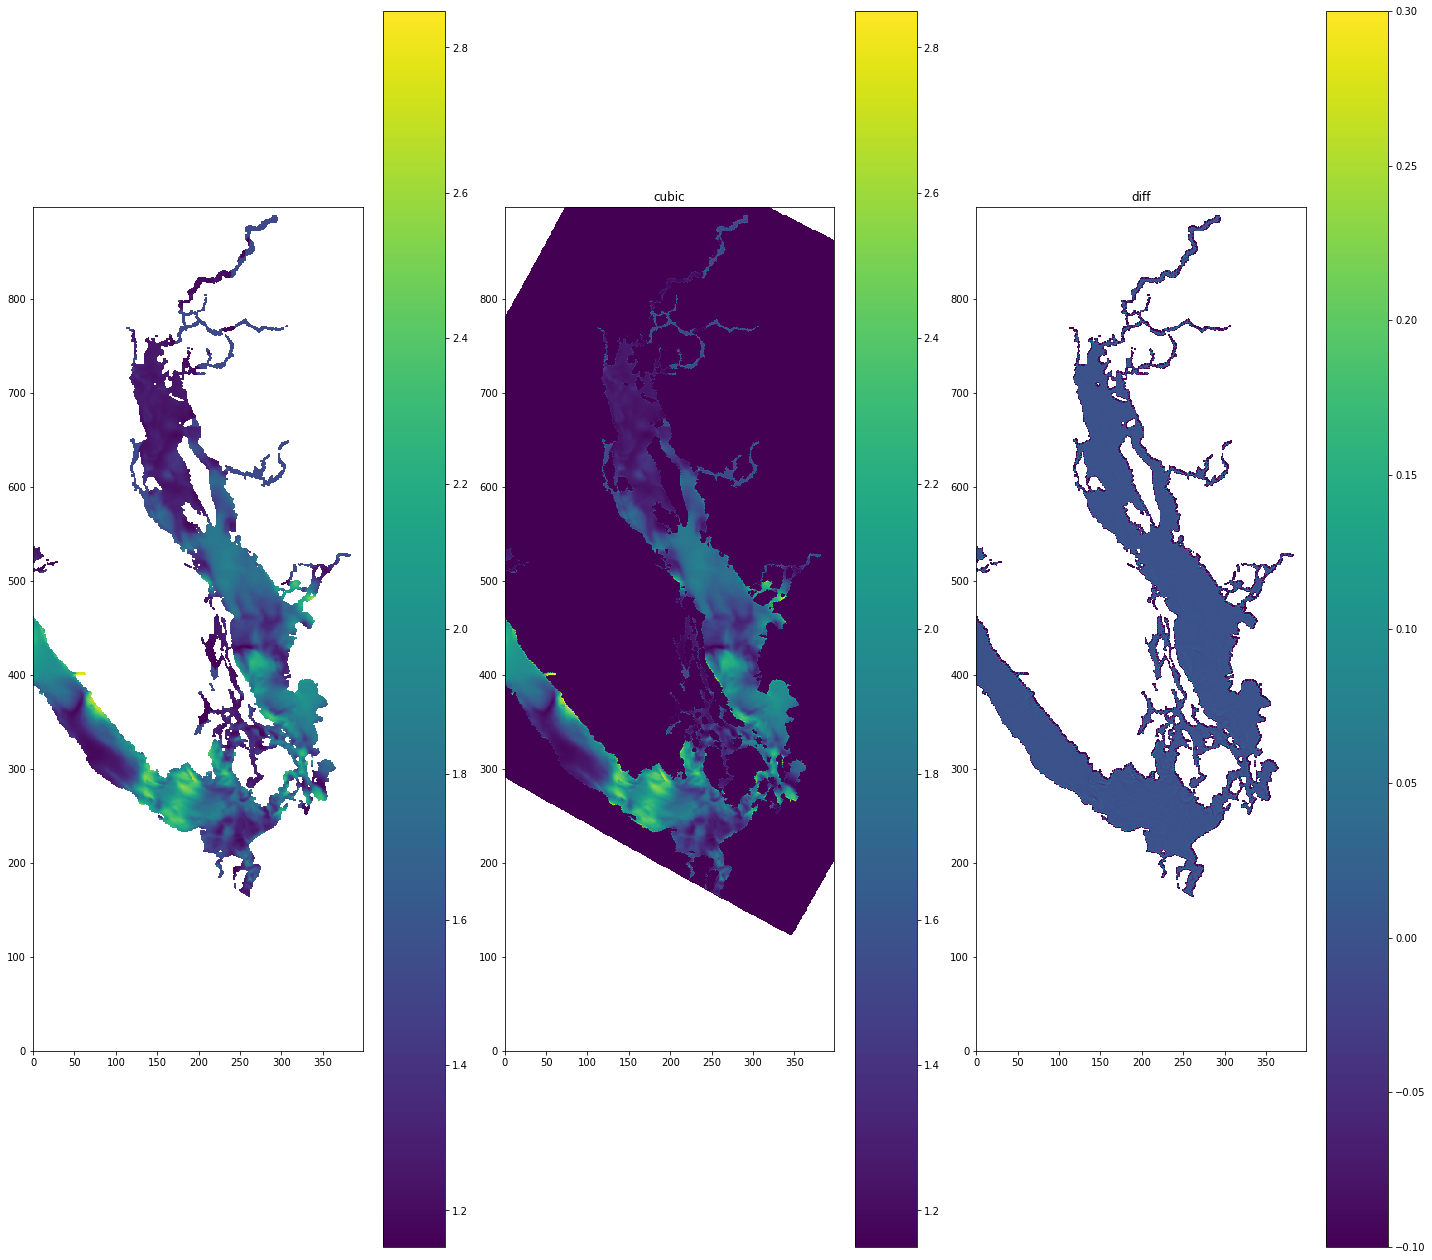

In [11]:
fig =  plt.figure(figsize = (20,20))
ax = plt.subplot(1,3,1)
plt.pcolormesh(mean_wave1, vmin = 1.15, vmax = 2.85)
viz_tools.set_aspect(ax)
plt.colorbar()
ax1 = plt.subplot(1,3,2)
plt.title('linear')
plt.pcolormesh(mean_wave, vmin = 1.15, vmax = 2.85)
viz_tools.set_aspect(ax1)
plt.title('cubic')
plt.colorbar()
ax2 = plt.subplot(1,3,3)
plt.pcolormesh(mean_wave1 - mean_wave, vmin = -0.1, vmax = 0.3)
viz_tools.set_aspect(ax2)
plt.title('diff')
plt.colorbar()
plt.tight_layout()